In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")
d=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.31_Final_Original.csv")


In [65]:
!pip install smogn
import smogn
dataset = smogn.smoter(
    
    data = d, 
    y = "WOMAC_total"
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


r_index: 100%|##########| 2/2 [00:00<00:00,  3.01it/s]


In [66]:
X = dataset.iloc[:,17:]
y = dataset.iloc[:, 9]

In [67]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)



featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21 22 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Number Of Best Features: 50
              Specs      Score
776         TA-G-91  14.464941
777         TA-G-92  14.185356
778         TA-G-93  13.266367
775         TA-G-90  12.733602
779         TA-G-94  12.379401
784         TA-G-99  11.288662
785        TA-G-100  11.180645
774         TA-G-89  10.271454
780         TA-G-95  10.168453
783         TA-G-98   9.721428
781         TA-G-96   8.864994
782         TA-G-97   8.816903
773         TA-G-88   8.168535
772         TA-G-87   6.532866
791  Swing_CCI_TA-G   5.810510
685          TA-G-0   5.178480
771         TA-G-86   5.064090
686          TA-G-1   4.542355
147             G68   4.523458
148             G69   4.458232
146             G67   4.296880
770         TA-G-85   4.028056
149             G70   4.003008
687          TA-G-2   3.868623
496        TA-RF-13   3.829210
145             G66   3.789536
759         TA-G-74   3.602075
497        TA-RF-14   3.554765
495        TA-RF-12   3.552504
150             G71   3.545535
672        

#TA-G-92

In [68]:
index = 0 #enter the serial of features

X_new = dataset[[imp.iloc[:,0:1].values[index][0]]]
y_new = dataset.iloc[:, 9]

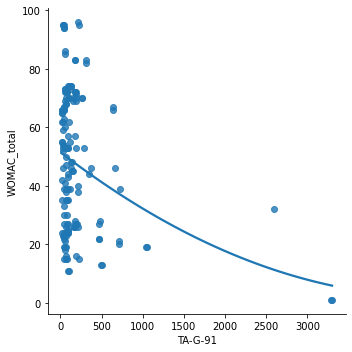

In [69]:
sns.lmplot(x = imp.iloc[:,0:1].values[index][0], y ="WOMAC_total", data = dataset, order = 2, ci = None)

In [70]:
X_train=X_new.iloc[:120,:]  
X_test=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]

In [71]:

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train) 


r_2 = model.score(X_test, y_test)
print('coefficient of determination (r2):', r_2)


print('intercept:', model.intercept_)

print('slope:', model.coef_) 

y_pred = model.predict(X_test)
print('Predicted response:', y_pred, sep='\n')


coefficient of determination (r2): -0.6485936597290707
intercept: 54.53396372474225
slope: [-0.01461893]
Predicted response:
[54.35311286 53.98172149 53.09381119 51.97357397 50.0021065  53.93041892
  6.27426284 53.10272792 47.40382575 53.82302345 51.3215368  53.42415855
 53.94507657 39.19632515 53.67930205 44.1231307  53.74626641 47.7495909
 53.90409106 53.82897398 53.93078935 53.62468979 53.25925301 53.2259853
 51.98245892 52.05837422 53.62096599 51.41593622 53.38558911 51.90227944
 47.63214685]


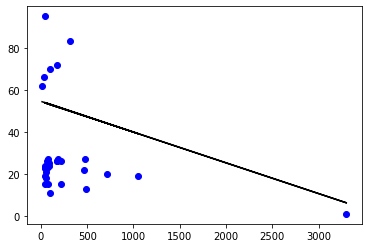

In [72]:

plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [73]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 27.620194045034605
MSE: 840.9268683009699
RMSE: 28.998739081225064


#TA-G-91

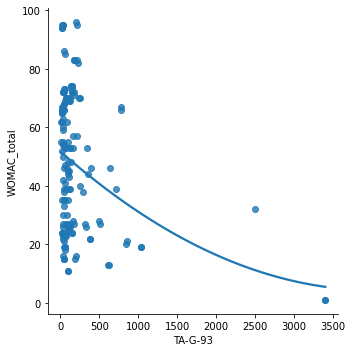

In [74]:
index = 2 #enter the serial of features

X_new = dataset[[imp.iloc[:,0:1].values[index][0]]]
y_new = dataset.iloc[:, 9]

sns.lmplot(x = imp.iloc[:,0:1].values[index][0], y ="WOMAC_total", data = dataset, order = 2, ci = None)

X_train=X_new.iloc[:120,:]  
X_test=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]


In [75]:

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train) 


r_2 = model.score(X_test, y_test)
print('coefficient of determination (r2):', r_2)


print('intercept:', model.intercept_)

print('slope:', model.coef_) 

y_pred = model.predict(X_test)
print('Predicted response:', y_pred, sep='\n')


coefficient of determination (r2): -0.630005134138361
intercept: 54.59495864868689
slope: [-0.01487628]
Predicted response:
[54.37161304 53.82831398 53.45037435 52.38825266 51.33269362 54.28638037
  4.14453935 53.13909331 45.2957227  53.96373165 51.85294464 53.81453605
 53.86954003 39.27687695 53.62562645 42.10581061 53.92882892 48.8409648
 53.81302992 53.58804164 54.3089146  53.60538245 52.37155142 52.95481432
 52.91902513 53.04923515 54.00707142 49.61192688 53.47482513 51.90000287
 47.0614252 ]


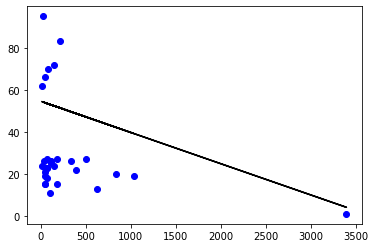

In [76]:

plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [77]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 27.382768825106677
MSE: 831.4450954462225
RMSE: 28.834789672307693
